## 目录  
+ 基础的分类模型---决策树
    + 改变树的参数
        + 树的深度
        + 输出特征重要程度
+ 画树状图  
    - 调树深  
    - 改分类规则  
    - 改最小叶子数   
+ 随机森林  
+ 随机森林调参  
    - max_feature参数  
    - n_estimator参数  
    - n_jobs参数  
- Support vector machines (SVM)  
    - 线性支持向量机  
    - 非线性支持向量机  
    - kernel = 'rbf'  
    - 自定义核  
- 多分类问题  
- LDA  
- QDA  
- 运用随机梯度下降法分类  
- 朴素贝叶斯算法做分类  
    - 朴素贝叶斯模型  
    - 多类别的朴素贝叶斯模型  
- 半监督学习  

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from IPython.display import Image

In [2]:
%matplotlib inline

# 基础的分类模型---决策树

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=1000, n_features=3,n_redundant=0)  # 没有冗余特征

In [5]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
preds = dt.predict(X)

In [7]:
(y == preds).mean()  # 正确率为1

1.0

#### 改变树的参数
- 树的深度

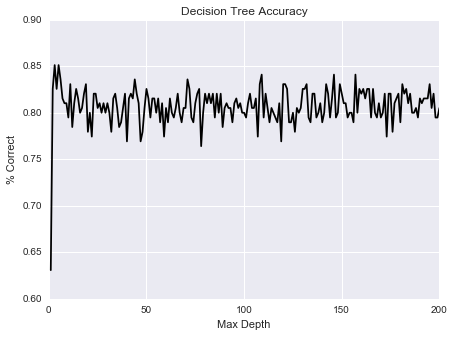

In [8]:
# 准备分类数据
n_features=200
X, y = datasets.make_classification(750, n_features,n_informative=5)

# 分出训练集和测试集
import numpy as np
training = np.random.choice([True, False], p=[.75, .25],size=len(y))

# 改变树的深度，看不同深度的准确率
accuracies = []
for x in np.arange(1, n_features+1):
    dt = DecisionTreeClassifier(max_depth=x)
    dt.fit(X[training], y[training])
    preds = dt.predict(X[~training])
    accuracies.append((preds == y[~training]).mean())
    
# 画出预测准确率随树的深度变化的关系图
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, n_features+1), accuracies, color='k')
ax.set_title("Decision Tree Accuracy")
ax.set_ylabel("% Correct")
ax.set_xlabel("Max Depth")

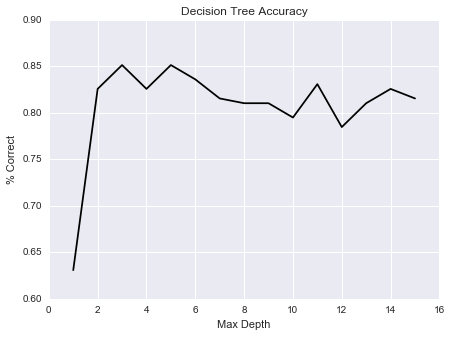

In [9]:
# 由于深度较小时的预测精度比较高，所以选取前15个深度值进一步做图像
N = 15
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, n_features+1)[:N], accuracies[:N], color='k')
ax.set_title("Decision Tree Accuracy")
ax.set_ylabel("% Correct")
ax.set_xlabel("Max Depth")

# 发现深度为2的预测精度最高

- 输出特征重要程度

In [10]:
dt_ci = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=200,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [11]:
dt.feature_importances_   # 输出特征的重要程度

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.01004433,  0.        ,  0.        ,  0.        ,  0.01211855,
        0.0116696 ,  0.        ,  0.        ,  0.00497781,  0.        ,
        0.        ,  0.        ,  0.        ,  0.19692619,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00444448,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00501964,  0.        ,  0.        ,
        0.00877142,  0.        ,  0.        ,  0.00956405,  0.        ,
        0.        ,  0.00504665,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00590082,  0.        ,  0.        ,  0.05915355,
        0.        ,  0.        ,  0.        ,  0.00517651,  0.        ,
        0.        ,  0.00259702,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

<Container object of 46 artists>

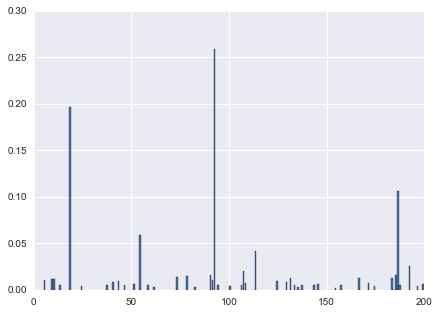

In [12]:
# 输出特征重要程度的图
ne0 = dt.feature_importances_ != 0
y_comp = dt.feature_importances_[ne0]  # y轴是重要程度
x_comp = np.arange(len(dt.feature_importances_))[ne0]  # x轴按照特征的顺序输出来，没有特征名称


import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(x_comp, y_comp)

# 画树状图  
- 调树深  
- 改分类规则  
- 改最小叶子数  

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
# 载入画树状图的模块
from StringIO import StringIO
from sklearn import tree
import pydot
# 先安装graphviz-2.38.msi（http://www.graphviz.org/Download_windows.php），手动设置环境变量C:\Program Files (x86)\Graphviz2.38\bin
# 再pip install pydot

In [15]:
# 准备分类数据
from sklearn import datasets
X, y = datasets.make_classification(1000, 20, n_informative=3)

In [16]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [17]:
str_buffer = StringIO()
tree.export_graphviz(dt, out_file=str_buffer)
graph = pydot.graph_from_dot_data(str_buffer.getvalue())
graph[0].write_jpg("decision_tree.png") # graph是list，graph[0]是pydot.Dot，有write_jpg方法

True

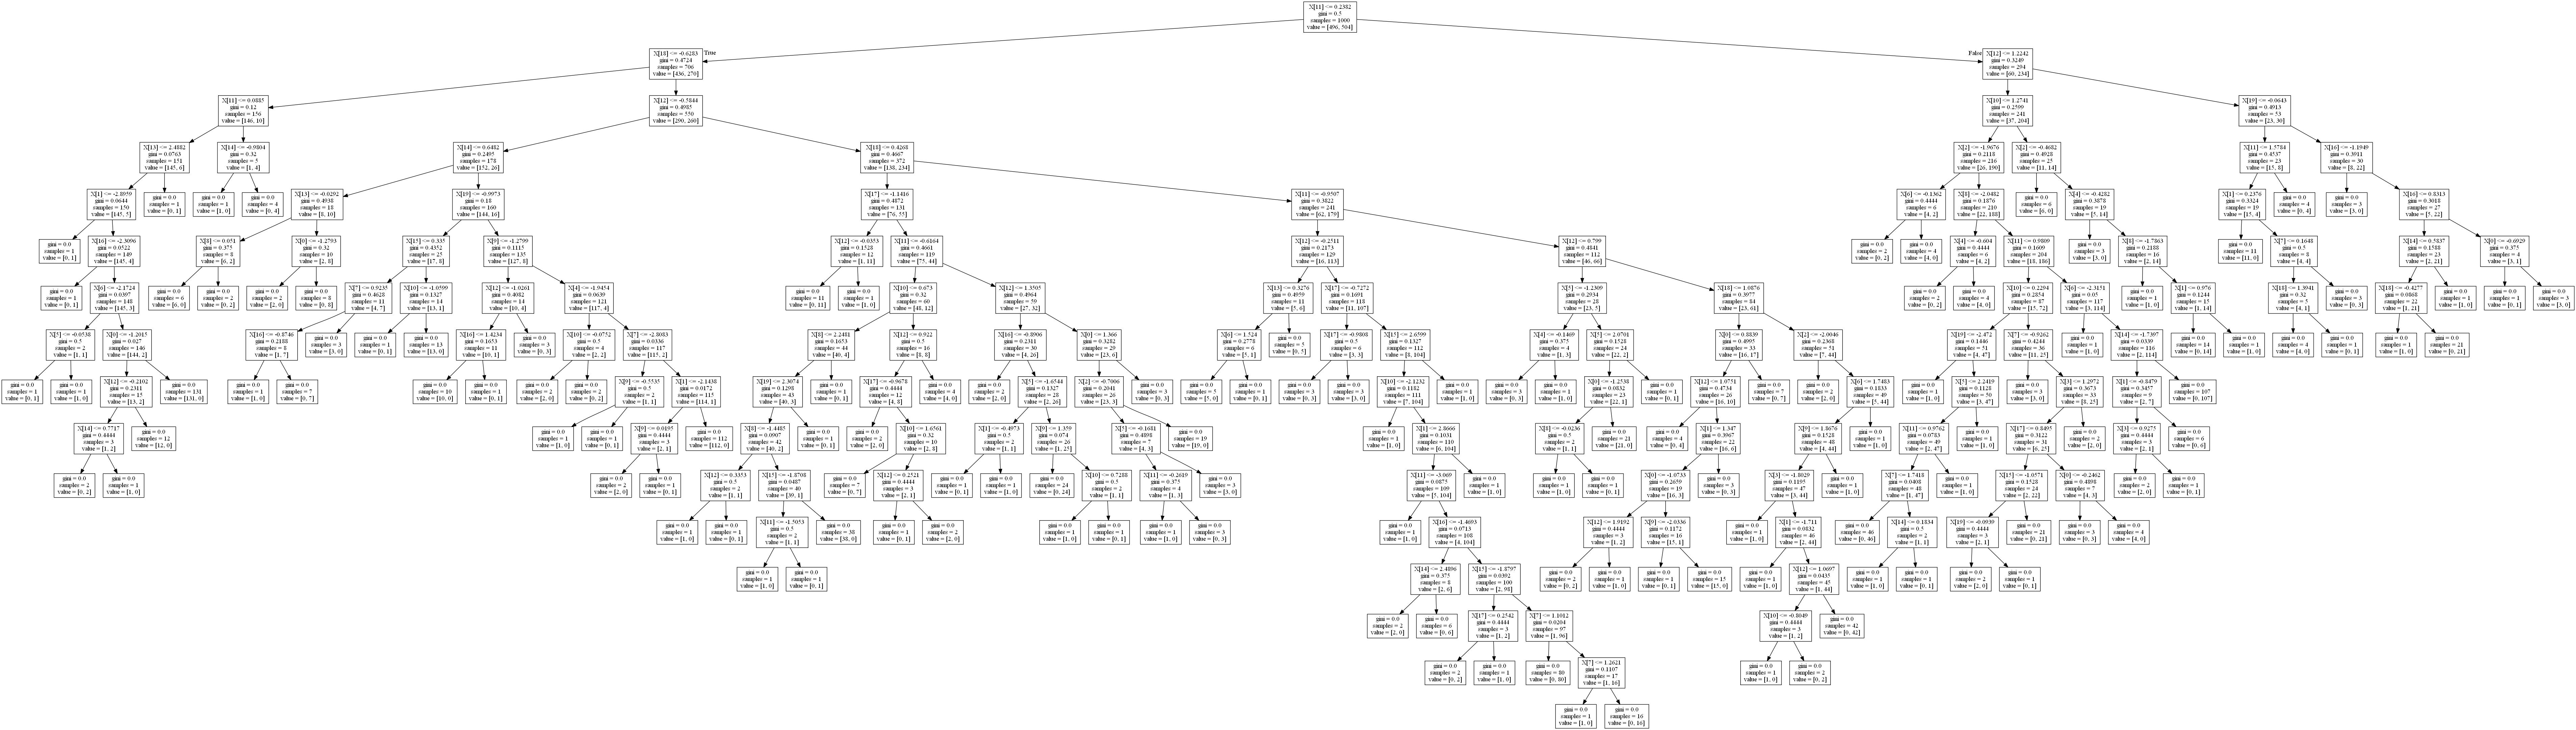

In [18]:
Image("decision_tree.png")

In [19]:
# 为画树状图定义函数【因为后期这个函数要用很多次】
def plot_dt(model, filename):
    str_buffer = StringIO()
    tree.export_graphviz(model, out_file=str_buffer)
    graph = pydot.graph_from_dot_data(str_buffer.getvalue())
    graph[0].write_jpg(filename)

In [20]:
dt = DecisionTreeClassifier(max_depth=5)  # 修改树的深度的参数
dt.fit(X, y);

# dt = DecisionTreeClassifier(max_depth=5).fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

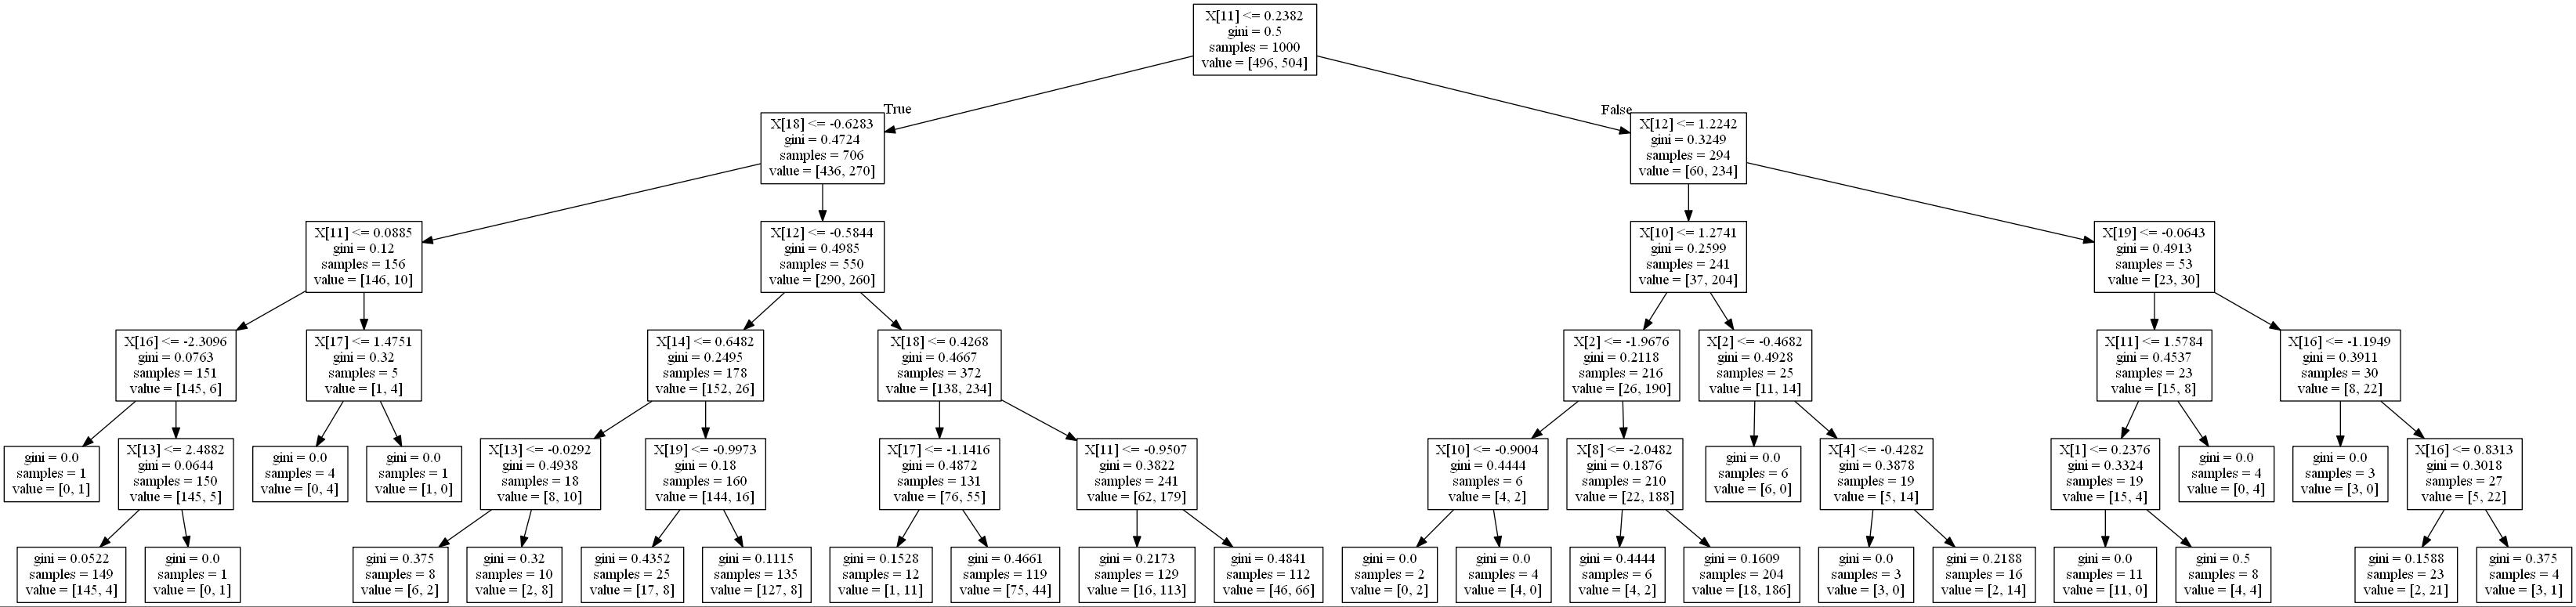

In [21]:
filename =  " DecisionTreeClassifier_max_depth_5.png"
plot_dt(dt,filename)
Image(filename)

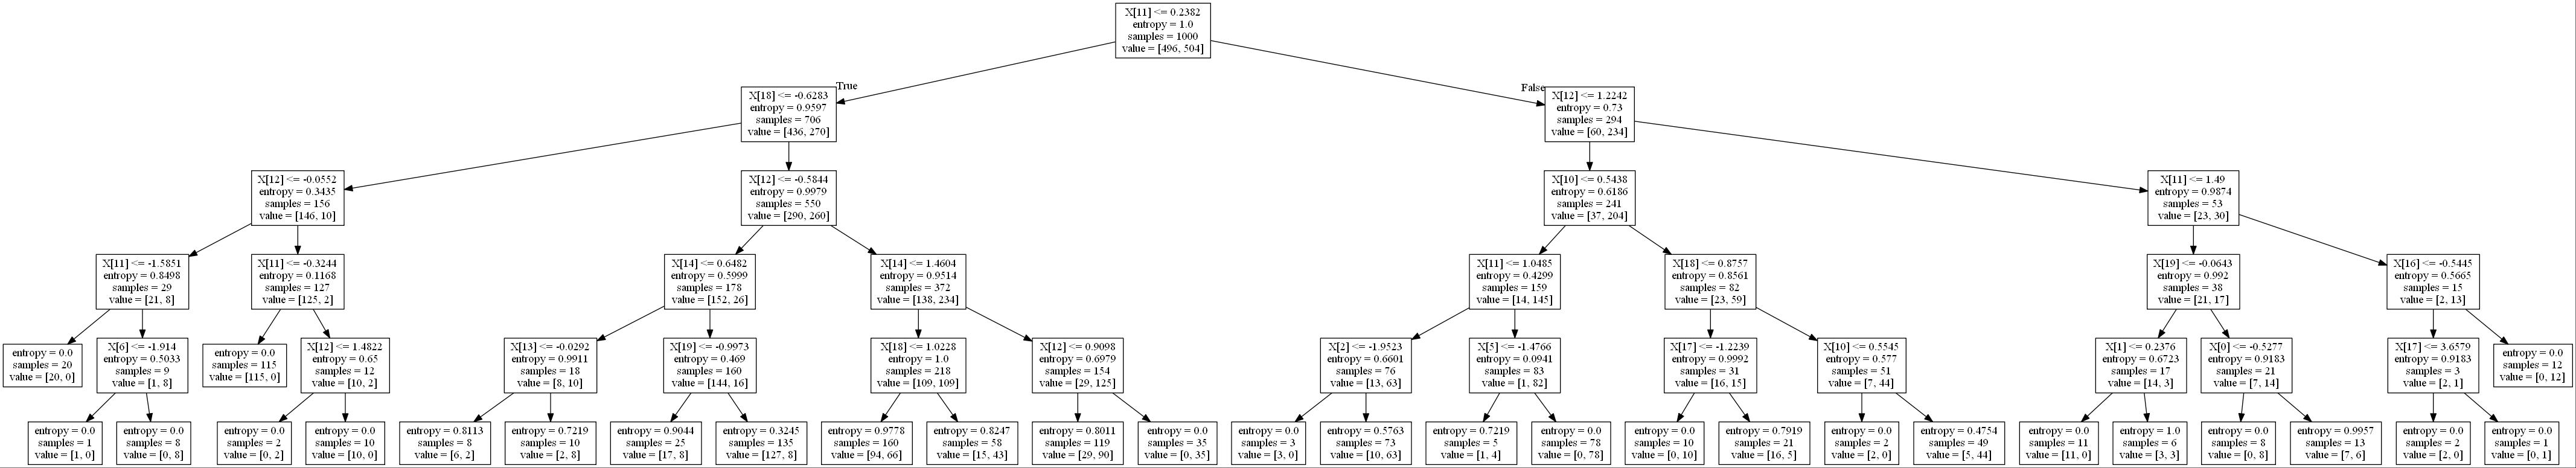

In [22]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5).fit(X, y)   # 修改分类准则
filename = "criterion_entropy.png"
plot_dt(dt, filename)
Image(filename)

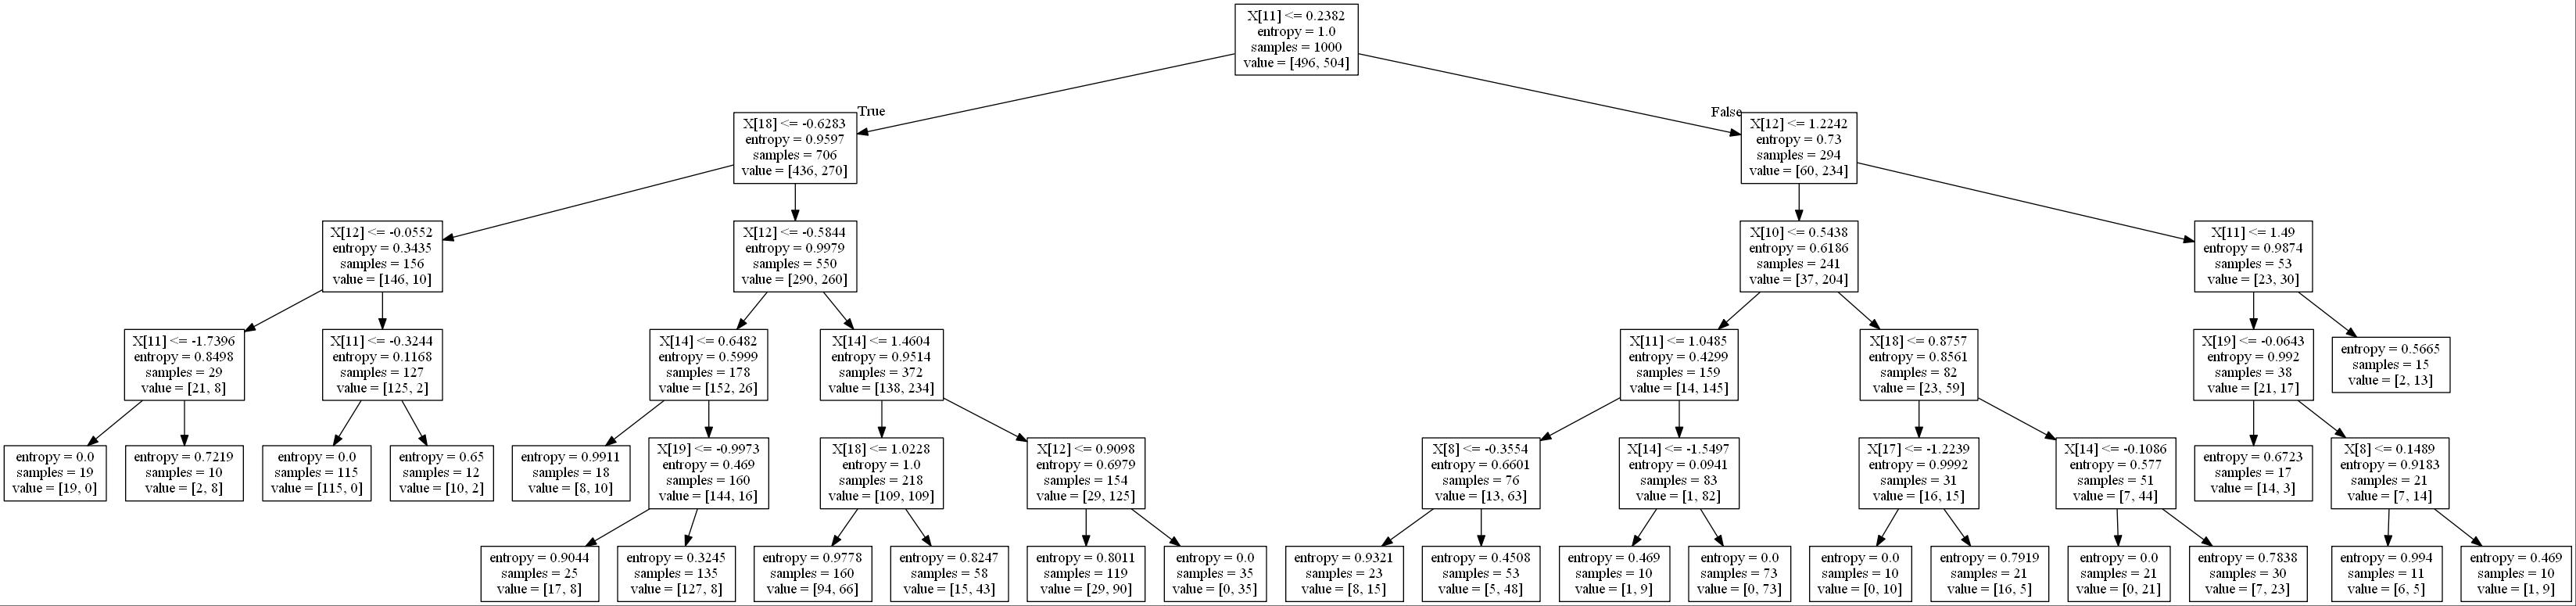

In [23]:
dt = DecisionTreeClassifier(min_samples_leaf=10,criterion='entropy',max_depth=5).fit(X, y)  # 修改最小叶子数
filename = "min_samples_leaf_10.png"
plot_dt(dt, filename)
Image(filename)

# 随机森林

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
from sklearn import datasets
X, y = datasets.make_classification(1000)   # 1000*20,分两类

In [26]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [27]:
# 计算预测准确率
print "Accuracy:\t", (y == rf.predict(X)).mean()
print "Total Correct:\t", (y == rf.predict(X)).sum()

Accuracy:	0.994
Total Correct:	994


#### 预测

In [28]:
# predict_proba方法返回属于每一类的概率，predict方法返回属于哪一类
probs = rf.predict_proba(X)   # X属于两类的概率

In [29]:
import pandas as pd
probs_df = pd.DataFrame(probs, columns=['0', '1'])
probs_df['was_correct'] = (rf.predict(X) == y)
probs_df.head()

,0,1,was_correct
0,0.1,0.9,True
1,0.0,1.0,True
2,0.0,1.0,True
3,0.0,1.0,True
4,0.1,0.9,True


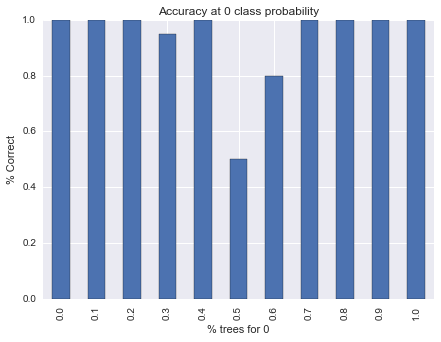

In [30]:
# 画出预测准确率的图形，发现在0.5附近的容易错分，准确率偏低
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7, 5))
probs_df.groupby('0').was_correct.mean().plot(kind='bar', ax=ax)
ax.set_title("Accuracy at 0 class probability")
ax.set_ylabel("% Correct")
ax.set_xlabel("% trees for 0")

#### 画特征重要性图
- feature_importances_属性

In [31]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

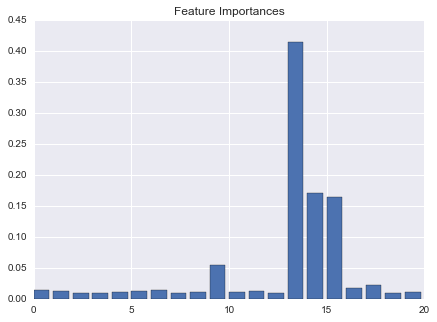

In [32]:
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(len(rf.feature_importances_)),rf.feature_importances_)
ax.set_title("Feature Importances")

# 随机森林调参

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10000,n_features=20,n_informative=15,flip_y=.5, weights=[.2, .8])

In [35]:
# 生成0.8的训练集，0.2的测试集
import numpy as np
training = np.random.choice([True, False], p=[.8, .2],size=y.shape)

#### 用默认参数做随机森林

In [36]:
rf = RandomForestClassifier()
rf.fit(X[training], y[training])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [37]:
preds = rf.predict(X[~training])

In [38]:
print "Accuracy:\t", (preds == y[~training]).mean()

Accuracy:	0.655870445344


 #### max_feature参数  
 - 每次划分考虑的特征个数

In [39]:
from sklearn.metrics import confusion_matrix
max_feature_params = ['auto', 'sqrt', 'log2', .01, .5, .99]

confusion_matrixes = {}
for max_feature in max_feature_params:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(X[training], y[training])
    confusion_matrixes[max_feature] = confusion_matrix(y[~training], rf.predict(X[~training])).ravel()    # ravel方法将2维混淆矩阵变为1维向量

In [40]:
confusion_df = pd.DataFrame(confusion_matrixes)
confusion_df

,0.01,0.5,0.99,auto,log2,sqrt
0,283,303,299,320,304,310
1,426,406,410,389,405,399
2,297,282,267,266,268,275
3,970,985,1000,1001,999,992


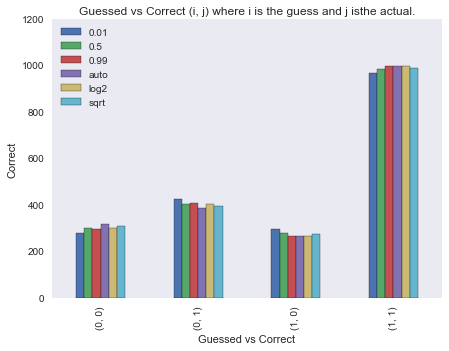

In [41]:
import itertools
from matplotlib import pyplot as plt

f, ax = plt.subplots(figsize=(7, 5))

confusion_df.plot(kind='bar', ax=ax)
ax.legend(loc='best')
ax.set_title("Guessed vs Correct (i, j) where i is the guess and j isthe actual.")

ax.grid()
ax.set_xticklabels([str((i, j)) for i, j in list(itertools.product(range(2), range(2)))]);
ax.set_xlabel("Guessed vs Correct")
ax.set_ylabel("Correct")

#### n_estimator参数  
- 随机森林的树的数量

In [42]:
n_estimator_params = range(1, 20)

confusion_matrixes = {}

for n_estimator in n_estimator_params:
    rf = RandomForestClassifier(n_estimators=n_estimator)
    rf.fit(X[training], y[training])
    confusion_matrixes[n_estimator] = confusion_matrix(y[~training],rf.predict(X[~training]))
    
    # 正确率 = 混淆矩阵的迹 / 混淆矩阵各元素之和
    accuracy = lambda x: np.trace(x) / np.sum(x, dtype=float)
    confusion_matrixes[n_estimator] = accuracy(confusion_matrixes[n_estimator])

In [43]:
accuracy_series = pd.Series(confusion_matrixes)

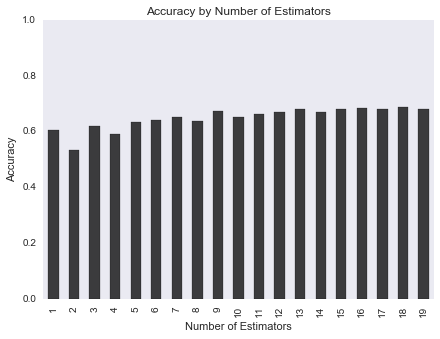

In [44]:
import itertools
from matplotlib import pyplot as plt

f, ax = plt.subplots(figsize=(7, 5))
accuracy_series.plot(kind='bar', ax=ax, color='k', alpha=.75)
ax.grid()

ax.set_title("Accuracy by Number of Estimators")
ax.set_ylim(0, 1) # we want the full scope
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of Estimators")

#### n_jobs参数  
- 控制并行的参数

In [45]:
rf = RandomForestClassifier(n_jobs=4, verbose=True)
rf.fit(X, y)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=4, oob_score=False, random_state=None,
            verbose=True, warm_start=False)

In [46]:
rf.predict(X)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


array([1, 1, 1, ..., 1, 0, 1])

# Support vector machines (SVM)

In [47]:
from sklearn.svm import SVC

#### 查看SVM的属性

In [48]:
from sklearn import datasets
X, y = datasets.make_classification()

In [49]:
base_svm = SVC()
base_svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

比较重要的几个属性  

C---对错误的惩罚力度  
class_weight---不同类别的权重  
gamma---核函数的gama参数  
kernel---核函数  

#### 线性支持向量机

In [50]:
X, y = datasets.make_blobs(n_features=2, centers=2)

In [51]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [52]:
from itertools import product
from collections import namedtuple

In [53]:
Point = namedtuple('Point', ['x', 'y', 'outcome'])

In [54]:
decision_boundary = []
# 找出X数据集两个特征的最大值、最小值
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

In [55]:
# 为下面绘制决策边界生成样本点
for xpt, ypt in product(np.linspace(xmin-2.5, xmax+2.5, 20),np.linspace(ymin-2.5, ymax+2.5, 20)):
    p = Point(xpt, ypt, svm.predict([[xpt, ypt]]))   # 生成3元素的元组，3个元素分别为样本点的x坐标、y坐标、预测分类
    decision_boundary.append(p)

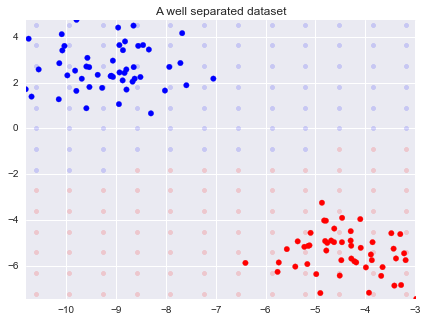

In [56]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))

import numpy as np
colors = np.array(['r', 'b'])

# 绘制决策边界（半透明点）
for xpt, ypt, pt in decision_boundary:
    ax.scatter(xpt, ypt, color=colors[pt[0]], alpha=.15)
    
# 绘制样本点，并以颜色表示预测分类
ax.scatter(X[:, 0], X[:, 1], color=colors[y], s=30)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
ax.set_title("A well separated dataset")

#### 非线性支持向量机

In [57]:
X, y = datasets.make_classification(n_features=2,n_classes=2,n_informative=2,n_redundant=0)

In [58]:
svm.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [59]:
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

In [60]:
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax),np.linspace(ymin, ymax))])

In [61]:
test_preds = svm.predict(test_points)

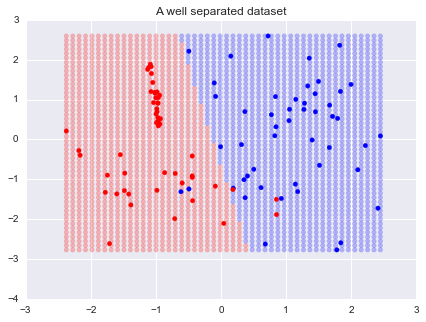

In [62]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))

import numpy as np
colors = np.array(['r', 'b'])

# 绘制决策边界（半透明点）
ax.scatter(test_points[:, 0], test_points[:, 1],color=colors[test_preds], alpha=.25)

# 绘制样本点，并以颜色表示预测分类
ax.scatter(X[:, 0], X[:, 1], color=colors[y])
ax.set_title("A well separated dataset")

#### kernel = 'rbf'

In [63]:
radial_svm = SVC(kernel='rbf')
radial_svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [64]:
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

In [65]:
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax),np.linspace(ymin, ymax))])

In [66]:
test_preds = radial_svm.predict(test_points)

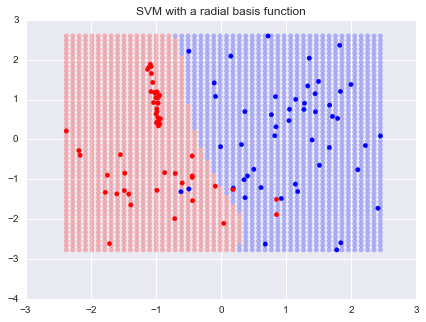

In [67]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))

import numpy as np
colors = np.array(['r', 'b'])

ax.scatter(test_points[:, 0], test_points[:, 1],color=colors[test_preds], alpha=.25)
ax.scatter(X[:, 0], X[:, 1], color=colors[y])
ax.set_title("SVM with a radial basis function")

#### 自定义核

In [68]:
def test_kernel(X, y):
    """ Test kernel that returns the exponentiation of the dot of the
    X and y matrices.
        This looks an awful lot like the log hazards if you're familiar with
    survival analysis.
    """
    return np.exp(np.dot(X, y.T))

In [69]:
test_svc = SVC(kernel=test_kernel)

In [70]:
test_svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function test_kernel at 0x000000000C8B7208>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [71]:
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax),np.linspace(ymin, ymax))])

test_preds = test_svc.predict(test_points)

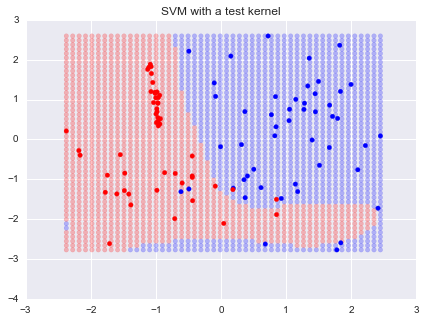

In [72]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))

import numpy as np
colors = np.array(['r', 'b'])

ax.scatter(test_points[:, 0], test_points[:, 1],color=colors[test_preds], alpha=.25)
ax.scatter(X[:, 0], X[:, 1], color=colors[y])
ax.set_title("SVM with a test kernel")

# 多分类问题

In [73]:
from sklearn.multiclass import OneVsRestClassifier

In [74]:
# 创建3分类数据集
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10000, n_classes=3,n_informative=3)

In [75]:
# 部分非线性分类器可以完成多分类工作
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X, y)
dt.predict(X)

array([0, 0, 0, ..., 1, 0, 2])

In [76]:
# 线性分类器无法自动完成多类别分类工作，需要引入OneVsRestClassifier类
from sklearn.linear_model import LogisticRegression

In [77]:
# one-vs-rest（one-vs-all）方法对每个类别都会建立一个分类器，因此可以多线程建模，设置n_jobs参数
mlr = OneVsRestClassifier(LogisticRegression(), n_jobs=2)
mlr.fit(X, y)
mlr.predict(X)

array([1, 0, 2, ..., 2, 0, 0])

#### 自定义函数模拟OneVsRestClassifier工作方式

In [78]:
# 用one-vs-rest方式重新编码标签
def train_one_vs_rest(y, class_label):
    y_train = (y == class_label).astype(int)
    return y_train

In [79]:
# 用one-vs-rest方式训练k个分类器，k为类别数
classifiers = []

for class_i in sorted(np.unique(y)):
    l = LogisticRegression()
    y_train = train_one_vs_rest(y, class_i)
    l.fit(X, y_train)
    classifiers.append(l)

In [80]:
# 分别计算样本点分到k类的概率，取概率最大的类
for classifier in classifiers:
     print classifier.predict_proba([X[0]])

[[ 0.83253136  0.16746864]]
[[ 0.47883228  0.52116772]]
[[ 0.71201581  0.28798419]]


# Linear Discriminant Analysis (LDA)

In [81]:
tickers = ["F", "TM", "GM", "TSLA"]
from pandas_datareader import data as external_data
stock_panel = external_data.DataReader(tickers, "yahoo")

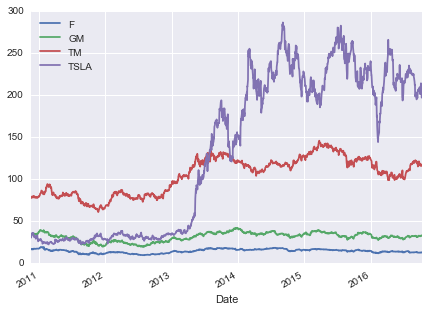

In [82]:
# 画出股票走势图
stock_df = stock_panel.Close.dropna()
stock_df.plot(figsize=(7, 5))

In [83]:
# 如果股价在未来6个月上涨，则标签为1，否则标签为0
classes = (stock_df.shift(-180) > stock_df).astype(int)
classes.head()

,F,GM,TM,TSLA
Date,,,,
2010-11-18,0,0,0,0
2010-11-19,0,0,0,0
2010-11-22,0,0,0,0
2010-11-23,0,0,0,0
2010-11-24,0,0,0,0


In [84]:
X = stock_panel.to_frame()
classes = classes.unstack()
classes = classes.swaplevel(0, 1).sort_index()

classes = classes.to_frame()

classes.index.names = ['Date', 'minor']

data = X.join(classes).dropna()
data.rename(columns={0: 'is_higher'}, inplace=True)

data.head()

Open       High        Low      Close       Volume  \
Date       minor                                                            
2010-11-18 F      16.770000  16.870001  16.049999  16.120001  256937900.0   
           GM     35.000000  35.990002  33.889999  34.189999  457044300.0   
           TM     77.360001  77.510002  76.830002  77.290001     989100.0   
           TSLA   30.670000  30.740000  28.920000  29.889999     956100.0   
2010-11-19 F      16.020000  16.379999  15.830000  16.280001  130323600.0   

                  Adj Close  is_higher  
Date       minor                        
2010-11-18 F      13.581237        0.0  
           GM     30.538663        0.0  
           TM     77.290001        0.0  
           TSLA   29.889999        0.0  
2010-11-19 F      13.716038        0.0

In [85]:
import patsy # This is a great library that can be used to create a design matrix in a similar fashion as R.

In [86]:
X = patsy.dmatrix("Open + High + Low + Close + Volume +is_higher - 1", data.reset_index(),return_type='dataframe')

In [87]:
X.head()

,Open,High,Low,Close,Volume,is_higher
0,16.770000,16.870001,16.049999,16.120001,256937900.0,0.0
1,35.000000,35.990002,33.889999,34.189999,457044300.0,0.0
2,77.360001,77.510002,76.830002,77.290001,989100.0,0.0
3,30.670000,30.740000,28.920000,29.889999,956100.0,0.0
4,16.020000,16.379999,15.830000,16.280001,130323600.0,0.0


#### LDA模型

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [89]:
lda = LDA()
lda.fit(X.ix[:, :-1], X.ix[:, -1]);

In [90]:
# 返回预测效果
from sklearn.metrics import classification_report
print classification_report(X.ix[:, -1].values,lda.predict(X.ix[:, :-1]))

             precision    recall  f1-score   support

        0.0       0.64      0.86      0.73      3346
        1.0       0.67      0.37      0.48      2582

avg / total       0.65      0.65      0.62      5928



# Quadratic Discernment Analysis (QDA)---非线性的LDA

In [91]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [92]:
qda = QDA()
qda.fit(X.ix[:, :-1], X.ix[:, -1])

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [93]:
predictions = qda.predict(X.ix[:, :-1])
predictions.sum()

3072.0

In [94]:
from sklearn.metrics import classification_report
print classification_report(X.ix[:, -1].values, predictions)

             precision    recall  f1-score   support

        0.0       0.66      0.56      0.61      3346
        1.0       0.52      0.62      0.57      2582

avg / total       0.60      0.59      0.59      5928



#### 算法原理

In [95]:
from sklearn import cross_validation as cv
import scipy.stats as sp

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [96]:
for test, train in cv.ShuffleSplit(len(X.Close), n_iter=1):
    # 划分训练集、测试集
    train_set = X.iloc[train]
    train_close = train_set.Close
    
    # 取出训练集的收盘价数据
    train_0 = train_close[~train_set.is_higher.astype(bool)]
    train_1 = train_close[train_set.is_higher.astype(bool)]
    
    # 取出测试集的收盘价数据
    test_set = X.iloc[test]
    test_close = test_set.Close.values
    
    # 分别计算样本属于0类、1类的概率
    ll_0 = sp.norm.pdf(test_close, train_0.mean())
    ll_1 = sp.norm.pdf(test_close, train_1.mean())

In [97]:
# 根据样本属于0类、1类的概率大小来分类
(ll_0 > ll_1).mean()

0.12296157450796626

# 运用随机梯度下降法分类

In [98]:
# 准备数据
from sklearn import datasets
X, y = datasets.make_classification()

In [99]:
from sklearn import linear_model
sgd_clf = linear_model.SGDClassifier()
sgd_clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [100]:
sgd_clf.predict(X)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0])

- 可以继续做预测精度的计算、画图等  
- 参数也可以自己改

# 朴素贝叶斯算法做分类

In [101]:
# 朴素贝叶斯多用于根据词频进行文档分类（例如垃圾邮件检测），这里下载新闻文档数据集
from sklearn.datasets import fetch_20newsgroups
categories = ["rec.autos", "rec.motorcycles"]   
newgroups = fetch_20newsgroups(categories=categories)  # 只取'autos'和'motorcycles'两类新闻

# 看数据长什么样子
print "\n".join(newgroups.data[:1])

From: gregl@zimmer.CSUFresno.EDU (Greg Lewis)
Subject: Re: WARNING.....(please read)...
Keywords: BRICK, TRUCK, DANGER
Nntp-Posting-Host: zimmer.csufresno.edu
Organization: CSU Fresno
Lines: 33

In article <1qh336INNfl5@CS.UTK.EDU> larose@austin.cs.utk.edu (Brian LaRose) writes:
>This just a warning to EVERYBODY on the net.  Watch out for
>folks standing NEXT to the road or on overpasses.   They can
>cause SERIOUS HARM to you and your car.  
>
>(just a cliff-notes version of my story follows)
>
>10pm last night, I was travelling on the interstate here in
>knoxville,  I was taking an offramp exit to another interstate
>and my wife suddenly screamed and something LARGE hit the side
>of my truck.  We slowed down, but after looking back to see the
>vandals standing there, we drove on to the police station.
>
>She did get a good look at the guy and saw him "cock his arm" with
>something the size of a cinderblock, BUT I never saw him. We are 
>VERY lucky the truck sits up high on the road; i

In [102]:
newgroups.target_names  # 两类新闻

['rec.autos', 'rec.motorcycles']

In [103]:
# 朴素贝叶斯模型将文档视为一堆词汇的组合，且将每个词的出现都视为独立事件
# 进行特征提取，将文档转化为一个稀疏矩阵，行为样本，列为词，每个出现的词都有自己的列，值为词出现的频率
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
bow = count_vec.fit_transform(newgroups.data)
bow

<1192x19177 sparse matrix of type '<type 'numpy.int64'>'
	with 164296 stored elements in Compressed Sparse Row format>

In [104]:
bow = np.array(bow.todense())

In [105]:
# 返回第一篇新闻中，出现频率不为0的前5个词
words = np.array(count_vec.get_feature_names())
words[bow[0] > 0][:5]

array([u'10pm', u'1qh336innfl5', u'33', u'93740',
       u'___________________________________________________________________'], 
      dtype='<U79')

In [106]:
'10pm' in newgroups.data[0].lower(),'1qh336innfl5' in newgroups.data[0].lower() # 检查这几个词是否在第一篇新闻中出现

(True, True)

#### 朴素贝叶斯模型

In [107]:
from sklearn import naive_bayes

In [108]:
# 将数据分为训练集和测试集
mask = np.random.choice([True, False], len(bow))

In [109]:
clf = naive_bayes.GaussianNB()
clf.fit(bow[mask], newgroups.target[mask])

GaussianNB(priors=None)

In [110]:
predictions = clf.predict(bow[~mask])

In [111]:
np.mean(predictions == newgroups.target[~mask])  # 返回正确率

0.94391025641025639

#### 多类别的朴素贝叶斯模型

In [112]:
# 获取3类新闻
from sklearn.datasets import fetch_20newsgroups
mn_categories = ["rec.autos", "rec.motorcycles","talk.politics.guns"]
mn_newgroups = fetch_20newsgroups(categories=mn_categories)

In [113]:
# 构造特征
mn_bow = count_vec.fit_transform(mn_newgroups.data)
mn_bow = np.array(mn_bow.todense())

In [114]:
# 提取训练集
mn_mask = np.random.choice([True, False], len(mn_newgroups.data))

In [115]:
multinom = naive_bayes.MultinomialNB()
multinom.fit(mn_bow[mn_mask], mn_newgroups.target[mn_mask])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [116]:
mn_predict = multinom.predict(mn_bow[~mn_mask])

In [117]:
np.mean(mn_predict == mn_newgroups.target[~mn_mask])

0.96326061997703794

# 半监督学习

In [118]:
from sklearn import datasets
d = datasets.load_iris()

In [119]:
X = d.data.copy()
y = d.target.copy()
names = d.target_names.copy()

In [120]:
# 添加没有标签的类别
names = np.append(names, ['unlabeled'])
names

array(['setosa', 'versicolor', 'virginica', 'unlabeled'], 
      dtype='|S10')

In [121]:
# 将y的标签随机改为-1，表示没有标签
y[np.random.choice([True, False], len(y))] = -1
y[:10]

array([ 0, -1,  0,  0, -1,  0, -1,  0, -1, -1])

In [122]:
names[y[:10]]

array(['setosa', 'unlabeled', 'setosa', 'setosa', 'unlabeled', 'setosa',
       'unlabeled', 'setosa', 'unlabeled', 'unlabeled'], 
      dtype='|S10')

#### 半监督模型

In [123]:
from sklearn import semi_supervised
lp = semi_supervised.LabelPropagation()
lp.fit(X, y)

LabelPropagation(alpha=1, gamma=20, kernel='rbf', max_iter=30, n_jobs=1,
         n_neighbors=7, tol=0.001)

In [124]:
preds = lp.predict(X)

In [125]:
(preds == d.target).mean()   # 分类正确率

0.95999999999999996

另一种实现方法

In [126]:
ls = semi_supervised.LabelSpreading()
ls.fit(X, y)

LabelSpreading(alpha=0.2, gamma=20, kernel='rbf', max_iter=30, n_jobs=1,
        n_neighbors=7, tol=0.001)

In [127]:
(ls.predict(X) == d.target).mean()

0.95999999999999996